<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionBanco1.PNG" alt="drawing" width="450">

Notas realizadas en el curso de edX Data Science: Probability, impartido por el profesor Rafael Irizarry de la Universidad de Harvard. En este notebook se estudian las operaciones de un banco que solo ofrece prestamos por simulaciones de Monte Carlo. Los resultados se verifican por medio de cálculos teóricos.

## Caso: operaciones sin cobrar intereses

Se carga la librería para trabajar con data frames.

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Primero creamos un modelo de tasas de interés. Consideramos n prestamos de 180,000 dls cada uno dados por el banco, se considera que por cada cliente que no paga el banco pierde 200,000 dls. La probabilidad de que un cliente no pague es del 2%.

In [2]:
n=1000 # Prestamos dados
perdidas_no_pago=-200000 # Pérdidas por cada cliente que no paga
p=0.02  # Probabilidad de no pago

Impago=sample(c(0,1),n,prob=c(1-p,p), replace=TRUE)
sum(Impago*perdidas_no_pago)

[1] -4600000

Bajo estos supuesto observamos que el banco perdió dinero. Ahora se procede a simular el mismo proceso 10,000 veces.

In [3]:
B=10000 # Simulaciones
Perdidas=replicate(B,{
  Impago=sample(c(0,1),n,prob=c(1-p,p), replace=TRUE)
  sum(Impago*perdidas_no_pago)
})

Se grafican las pérdidas del banco, se observa que si cobrar intereses es prácticamente imposible que el banco gane dinero.

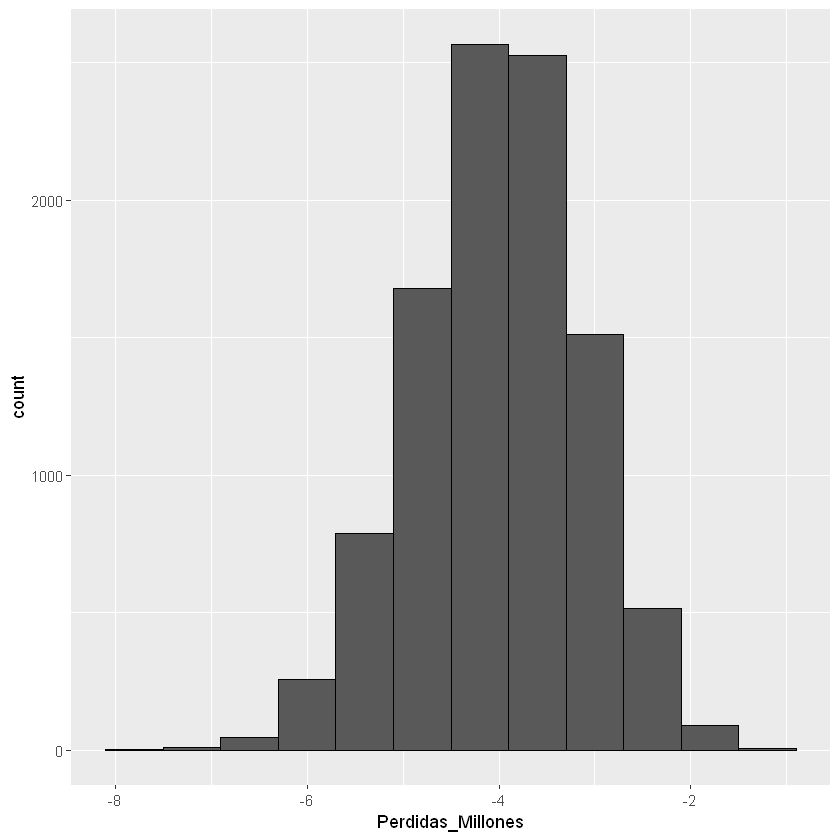

In [4]:
data.frame(Perdidas_Millones=Perdidas/10^6) %>%
  ggplot(aes(Perdidas_Millones))+
  geom_histogram(binwidth=0.6, col="black")

Ahora determinamos el valor esperado (E) de ganancias y el error estándar (SE)

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionBanco2.PNG" alt="drawing" width="450">

In [5]:
E_S=n*(p*perdidas_no_pago+(1-p)*0)
SE_S=sqrt(n)*abs(perdidas_no_pago)*sqrt(p*(1-p))

E_S/10^6
SE_S/10^6

[1] -4

[1] 0.8854377

Se observa que los valores obtenidos por la simulación de Monte Carlo son coherentes con los teóricos.

## Caso: operaciones cobrando intereses

Se determina la tasa de interés que le permitiría al banco no tener pérdidas. Hay que recordar que cada prestamo dado es de 180,000 dls.

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionBanco3.PNG" alt="drawing" width="250">

In [6]:
x=-perdidas_no_pago*p/(1-p)
x/180000

[1] 0.02267574

Se realiza la simulación de Monte Carlo considerando las ganancias generadas por el interés del 2.3%

In [7]:
n=1000 # Prestamos dados
perdidas_no_pago=-200000 # Pérdidas por cada cliente que no paga
p=0.02  # Probabilidad de no pago
ganancia_pago=x # Ganancia por la tasa de interés

B=10000 # Simulaciones
Prestamos=replicate(B,{
  Ganancias=sample(c(ganancia_pago,perdidas_no_pago),n,prob=c(1-p,p), replace=TRUE)
  sum(Ganancias)
})

Ahora gráficamos las ganancias obtenidas por las simulaciones de Monte Carlo. Se observa que de media el banco no pierde ni gana dinero, tal como se determinó en primer lugar.

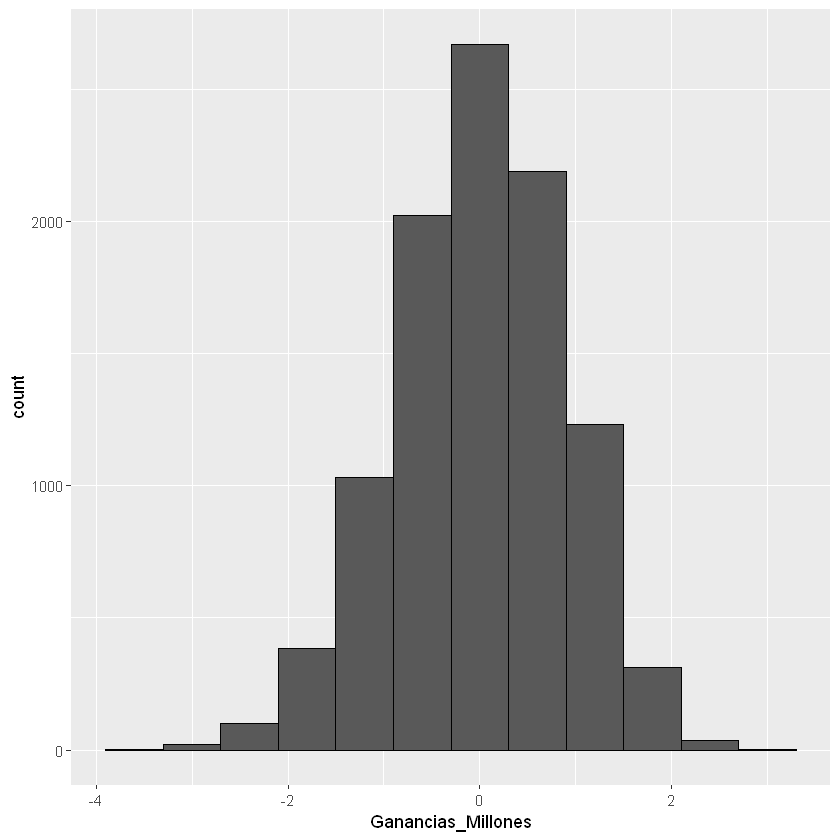

In [8]:
data.frame(Ganancias_Millones=Prestamos/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=0.6, col="black")

Ahora se cambia el escenario de tal manera de que solo exista un 1% de probabilidad de que el banco tenga pérdidas. Empezamos determinando la tasa de interés que nos permita esto. Como se puede obsevar en la gráfica delas ganancias, la distribución de la muestra parece normal, utilizaremos ésto para calcular la tasa de interés. 

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionBanco4.PNG" alt="drawing" width="450">

In [9]:
l=perdidas_no_pago
z=qnorm(0.01)
x=-l*(n*p-z*sqrt(n*p*(1-p)))/(n*(1-p)+z*sqrt(n*p*(1-p)))
x/180000

[1] 0.03471767

La nueva tasa es del 3.5%, se realiza una nueva simulación de Monte Carlo y se grafican las ganancias resultantes. 

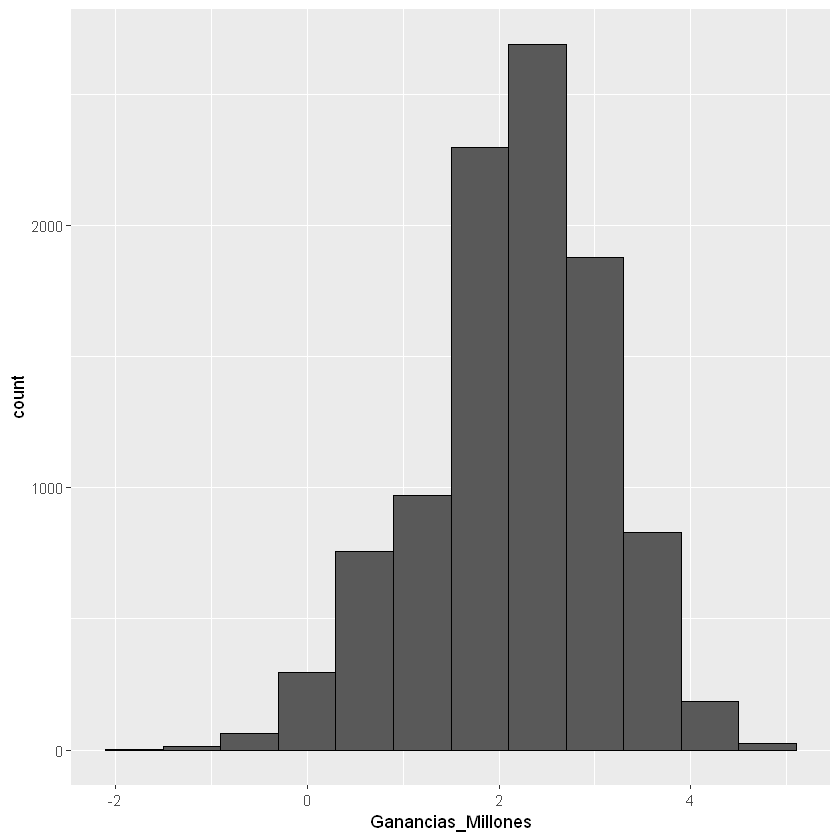

In [10]:
n=1000 # Prestamos dados
perdidas_no_pago=-200000 # Pérdidas por cada cliente que no paga
p=0.02  # Probabilidad de no pago
ganancia_pago=x # Ganancia por la tasa de interés del 3.5%

B=10000 # Simulaciones
Prestamos=replicate(B,{
  Ganancias=sample(c(ganancia_pago,perdidas_no_pago),n,prob=c(1-p,p), replace=TRUE)
  sum(Ganancias)
})

data.frame(Ganancias_Millones=Prestamos/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=0.6, col="black")

Se revisa la simulación por medio de un cálculo teórico, se observa que existe coherencia entre el valor esperado de la ganancia  determinada por la teoría y la media de la muestra obtenida por la simulación.

In [11]:
# La nueva tasa de interés es del 3%, se revisa valor esperado de ganancias
d=perdidas_no_pago*p+x*(1-p) # Ganancia por préstamo
n*d/10^6 # Ganancia total

[1] 2.124198

## Caso: incrementándo prestamos brindados

Debido a que se están obteniendo ganancias de cada préstamo dado, se estudia la posibilidad de incrementar el número de préstamos brindados. Esto hace que la probabilidad de impago aumente por lo que también se tiene que incrementar la tasa de interés. Se observa que con una probabilidad de impago del 4% y una tasa del 5%, aún se esperan ganancias para el banco por cada préstamo dado.

In [12]:
p=0.04     # Probabilidad de impago
r=0.05     # Tasa de interés
x=r*180000 # Ganancia de cada préstamo
perdidas_no_pago*p+x*(1-p)

[1] 640

Ahora se determina el número de préstamos necesarios para que la probabilidad de pérdida para el banco se mantenga en 1%, de manera similar se considera que la distribución de la población se asemeja a la normal. 

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/SimulacionBanco5.PNG" alt="drawing" width="350">

In [13]:
z=qnorm(0.01)
l=perdidas_no_pago
n=ceiling((z^2*(x-l)^2*p*(1-p))/(l*p+x*(1-p))^2)
n # Préstamos para minimizar probabilidad de pérdidas
n*(perdidas_no_pago*p+x*(1-p))/10^6 # Ganancia esperada

[1] 22163

[1] 14.18432

Se observa que brindando 22,163 préstamos, se esperan ganancias de 14 millones de dls. Se realiza una simulación de Monte Carlo para verificar los resultados. Nuevamente todo parece en orden.

[1] 14.21607

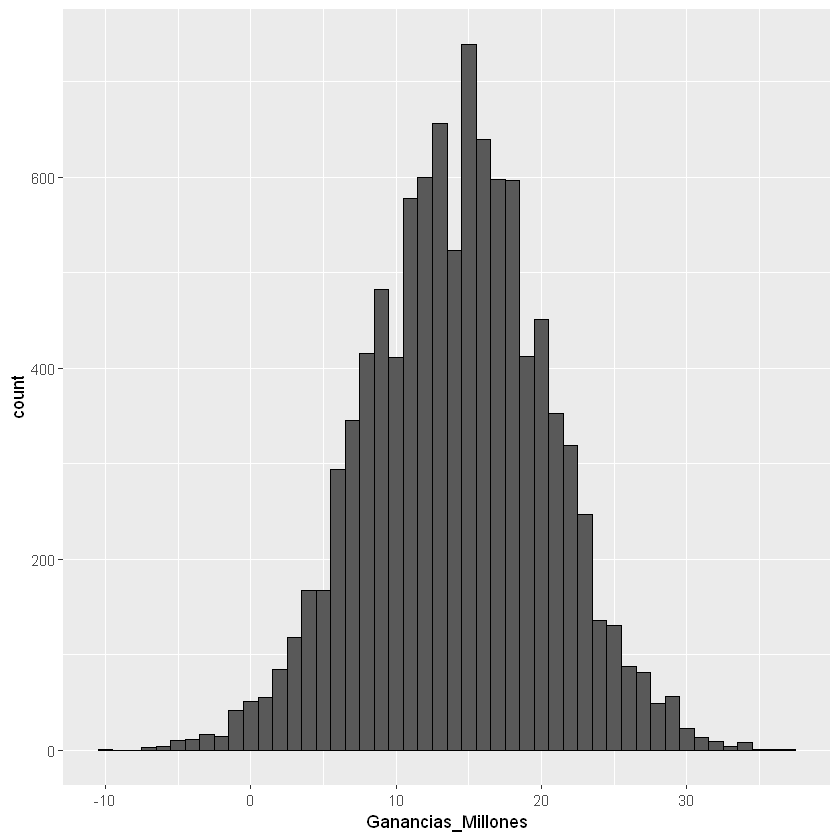

In [14]:
B=10000
Ganancias=replicate(B,{
  prestamos=sample(c(x,perdidas_no_pago),n,prob=c(1-p,p),replace=TRUE)
  sum(prestamos)
})
mean(Ganancias)/10^6

data.frame(Ganancias_Millones=Ganancias/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=1, col="black")

## Caso: la probabilidad de impago no es constante

Hasta ahora nuestras simulaciones han sido válidas debido a que se ha considerado que la probabilidad de impago es independiente para todos los clientes, sin embargo, en caso de ocurrir algún evento que originara la modificación de la probabilidad de impago p para todos los clientes, entonces se obtendrían valores muy diferentes.

Para simular esto se considerará que la probabilidad de impago sigue una distribución uniforme entre el 3% y 5%. 

In [15]:
Ganancias2=replicate(B,{
  nueva_p=0.04+sample(seq(-0.01,0.01,length=100),1)
  prestamos=sample(c(x,perdidas_no_pago),n,prob=c(1-nueva_p,nueva_p), replace=TRUE)
  sum(prestamos)
})

Se determinan las nuevas probabilidades de perder dinero para este nuevo caso. Se observa que aún se esperan ganancias de 14 millones de dls, sin embargo, ahora las probabilidades de perder dinero se han incrementado hasta un 34%. Más aún, se observa que la probabilidad de perder 10 millones de dls es del 24%.

In [16]:
mean(Ganancias2)/10^6
mean(Ganancias2<0)
mean(Ganancias2< -10000000)

[1] 14.54025

[1] 0.3423

[1] 0.2363

Se grafica la muestra obtenida por la simulación de Monte Carlo, se observa que ahora ya no se asemeja más a la normal. 

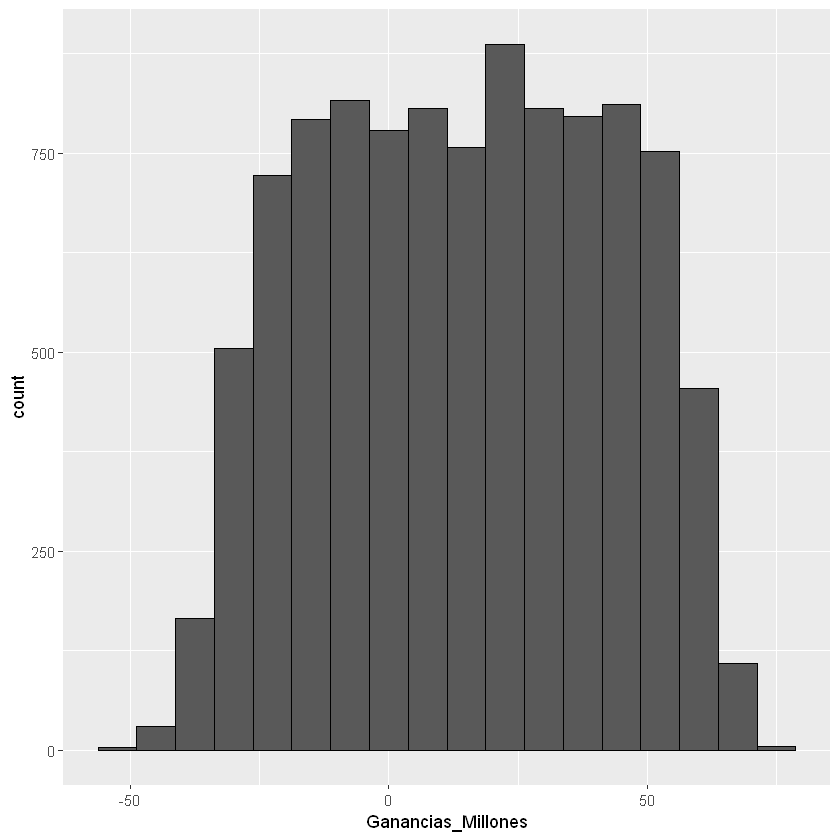

In [17]:
data.frame(Ganancias_Millones=Ganancias2/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=7.5, col="black")

## Caso: reduciendo probabilidad de impago

Otra manera de incrementar las ganancias sería manteniendo la tasa del 3.5% pero a la vez reduciendo la probabilidad de impago. Al considerar una probabilidad de impago de 1% la ganancia esperada sube a 4 millones de dls. Este valor es mayor a los 2 millones estimados originalmente pero considerablemente menor a los 14 millones estimados al incrementar el número de préstamos. 

In [18]:
n=1000 # Prestamos dados
perdidas_no_pago=-200000 # Pérdidas por cada cliente que no paga
p=0.01  # Probabilidad de no pago
ganancia_pago=0.035*180000 # Ganancia por la tasa de interés
perdidas_no_pago*p+ganancia_pago*(1-p)

[1] 4237

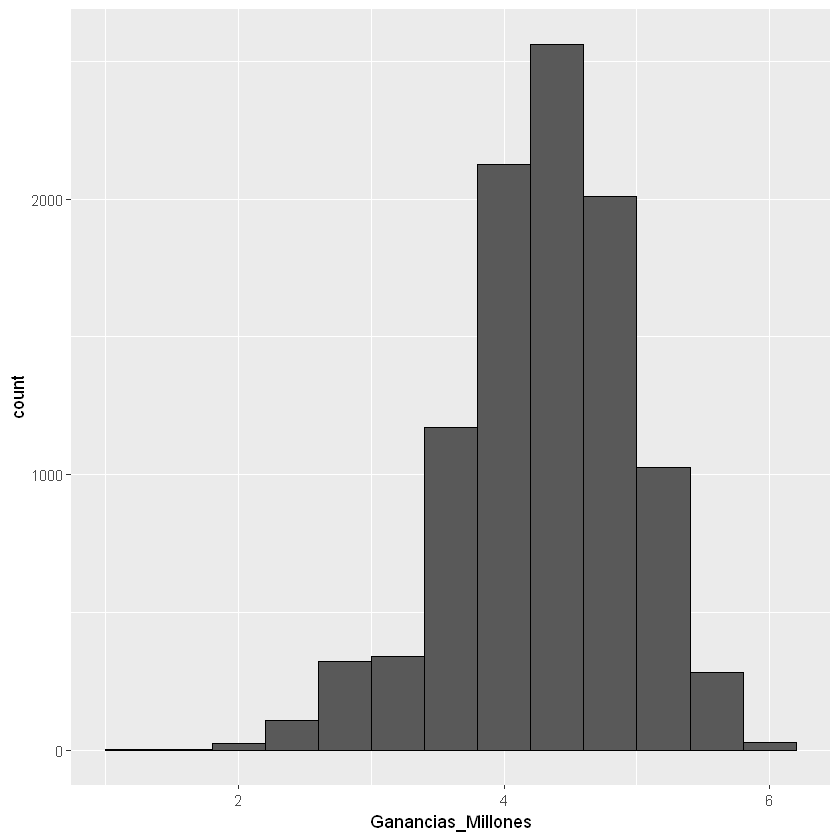

In [19]:
B=10000 # Simulaciones
Prestamos=replicate(B,{
  Ganancias=sample(c(ganancia_pago,perdidas_no_pago),n,prob=c(1-p,p), replace=TRUE)
  sum(Ganancias)
})

data.frame(Ganancias_Millones=Prestamos/10^6) %>%
  ggplot(aes(Ganancias_Millones))+
  geom_histogram(binwidth=0.4, col="black")